# Aarav Gosalia

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
sns.set_theme(style="ticks", font_scale=0.8)

In [23]:
dataset = pd.read_csv("../data/raw/dataset_raw.csv")
dataset

C:\Users\aarav\AppData\Local\Temp\ipykernel_13436\3603182538.py:1: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../data/raw/dataset_raw.csv")


,iso_code,region_group,income_group,country,survey,year,level,grade,category,Sex,...,rlevel3_m,rlevel3_no,slevel3_m,slevel3_no,mlevel4_m,mlevel4_no,rlevel4_m,rlevel4_no,slevel4_m,slevel4_no
0,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212964,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212965,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212966,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212967,NaN,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data = dataset[["region_group","country","year","Location","Region","literacy_1524_no"]]
data.describe()

,year,literacy_1524_no
count,212879.000000,25557.00000
mean,2009.909070,787.90531
std,5.434321,1825.95407
min,1996.000000,30.00000
25%,2006.000000,104.00000
50%,2011.000000,253.00000
75%,2015.000000,732.00000
max,2019.000000,55976.00000


In [30]:
data.describe(exclude=[np.number])

,region_group,country,Location,Region
count,212939,212879,94809,49092
unique,7,176,2,1587
top,Latin America and the Caribbean,Brazil,Urban,Central
freq,58636,6538,51664,857


In [31]:
data = data.dropna(subset="literacy_1524_no")
data = data.reset_index()
data = data.drop(columns = ["index"])

In [32]:
data

,region_group,country,year,Location,Region,literacy_1524_no
0,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,153.0
1,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,983.0
2,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,527.0
3,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,174.0
4,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,5499.0
...,...,...,...,...,...,...
25552,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Mashonaland West,647.0
25553,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Masvingo,459.0
25554,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Matabeleland North,211.0
25555,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Matabeleland South,231.0


In [38]:
literacy_rate_country = data.groupby(["country","year"]).sum()
literacy_rate_country.describe()

C:\Users\aarav\AppData\Local\Temp\ipykernel_13436\3134145324.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  literacy_rate_country = data.groupby(["country","year"]).sum()


,literacy_1524_no
count,198.000000
mean,101699.474747
std,100069.854908
min,3406.000000
25%,44273.500000
50%,75965.000000
75%,119456.250000
max,839365.000000


<AxesSubplot:xlabel='country,year'>

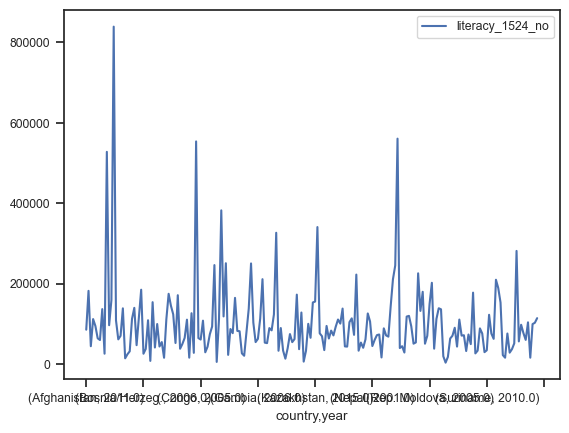

In [50]:
literacy_rate_country.plot()

## Research question/interests
**In relatively literate countries has there been a change in how important education is?**

Briefly describe your research question or interests here.

I will use the literacy_1524_no column to find locations with medium to high literacy rates and compare the literacy rates of those locations over a specific time period. I will use a line graph with the x-axis being time periods and the y-axis being different locations and use that to analyze whether there has been a change in the mentality of parents/children in their view of the importance of education